## Statistical Analysis 2: Analyze the impact of vocabulary diversity on the essay score.

This notebook examines the extent to which vocabulary diversity influences the evaluation score.

## Approach
Since the data is highly imbalanced—due to the exclusion of scores below 4 and at 9 in the band_score—only the relative word frequencies within each score category can be considered and compared across classes.

Because the number of samples in a score category is somewhat correlated with the vocabulary size within that category, a direct comparison of raw frequencies is not meaningful.

Accordingly, we decided to compare word clouds for the individual score categories.

## Key findings
Overall, it can be assumed that vocabulary diversity is correlated with the scores. It has also been observed that the data is highly imbalanced, which would likely require mitigation strategies such as oversampling.

## Imports und Setup
---

In [2]:
import pandas as pd
import numpy as np
from os import path
import sys

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sys.path.append(path.dirname(path.abspath("")))
project_root = path.dirname(path.abspath(""))
print(project_root)

c:\Users\Sascha\Desktop\StudiumWin\4.Semester\NLP\Projekte\Team 10\team-10


In [3]:
pd.options.plotting.backend = "plotly"

# show the first 200 characters per attribute, None shows all
pd.set_option("max_colwidth", 100)

## Data import

---

In [4]:
csv_file = "/data/clean_train.csv"
csv_file_path = project_root + csv_file
print(csv_file_path)

df = pd.read_csv(csv_file_path)

c:\Users\Sascha\Desktop\StudiumWin\4.Semester\NLP\Projekte\Team 10\team-10/data/clean_train.csv


In [12]:
df.head(1)

prompt  \
0  Interviews form the basic criteria for most large companies. However, some people think that the...   

                                                                                                 essay  \
0  It is believed by some experts that the traditional approach of recruiting candidates which is i...   

                                                                                            evaluation  \
0  **Task Achievement: [7]**\nThe essay effectively addresses the given task. The candidate clearly...   

                            band_score_old  \
0  7.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r   

                                                                          task_achievement_description  \
0  Task Achievement: [7]** The essay effectively addresses the given task. The candidate clearly st...   

   task_achievement_score  \
0                     7.0   

                                                                    coherence_and_cohesion_description  \
0  Coherence and Cohesion: [7.5]** The essay is well-organized and easy to follow. Transitions betw...   

   coherence_and_cohesion_score  \
0                           7.5   

                                                                          lexical_resource_description  \
0  Lexical Resource: [7]** The candidate demonstrates a good range of vocabulary. The majority of t...   

   lexical_resource_score  \
0                     7.0   

                                                            grammatical_range_and_accuracy_description  \
0  Grammatical Range and Accuracy: [7]** The essay exhibits a variety of sentence structures, inclu...   

   grammatical_range_and_accuracy_score  \
0                                   7.0   

                                                                        overall_band_score_description  \
0  Overall Band Score: [7.5]** The essay effectively addresses the given task, demonstrates good co...   

   band_score  
0         7.5

## Utility methods

---

This method plots word clouds for each provided score category.

In [29]:
class wordcloud_per_score:
    def __init__(self, text_score, stopwords=""):
        self.text_score = text_score
        self.stopwords = stopwords

        # Sortiertes Dictonary mit der anzahl der jeweiligen Scores
        work = np.array(text_score)
        vert = {}
        for score in work[:, 1][0]:
            if str(score) not in vert:
                vert[str(score)] = 1
        else:
            vert[str(score)] += 1

        self.sorted_dict = dict(sorted(vert.items()))

        # Texte nach Score zusammenführen
        keys = self.sorted_dict.keys()

        self.keys_list = list(self.sorted_dict.keys())
        self.essay_text_same_score = [None] * len(keys)

        for ind, k in enumerate(keys):
            self.essay_text_same_score[ind] = df[df["band_score"] == float(k)]["essay"]

        # stopword für wordcloud
        stopwords = stopwords.split(" ")
        STOPWORDS.update(stopwords)

    def change_stopwords(self, stopwords):
        stopwords = stopwords.split(" ")
        STOPWORDS.update(stopwords)

    def print_wordcloud(self):
        for ind in range(len(self.keys_list)):
            text = ""
            for s in self.essay_text_same_score[ind]:
                text += " " + s
            if(text != ""):
                wordcloud = WordCloud().generate(text)
                plt.imshow(wordcloud, interpolation="bilinear")
                print(f"Score: {self.keys_list[ind]}")
                plt.show()
        

            

## Stopwords

--- 

Certain words occurred with comparable frequency across all score categories and were thus excluded by incorporating them into the stopword list.

In [ ]:
stopwords = "will many one people"

# Task achievement 
---
The score distribution reveals a significant class imbalance. Therefore, we decided to exclude data with scores of 9 and below 4.

Analyzing the progression of the word clouds, we observe that the word frequency becomes more balanced as the scores improve. Additionally, the word government appears to be used more frequently in higher-rated essays.

Based on the task score alone, a slight correlation between the assigned score and the vocabulary used can be observed.

In [32]:
df["task_achievement_score"].hist(bins=100)

In [30]:
Task_essay = [(df["essay"], df["task_achievement_score"])]
task = wordcloud_per_score(Task_essay, stopwords)

Score: 4.0


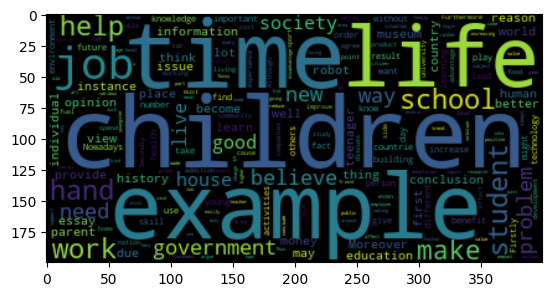

Score: 4.5


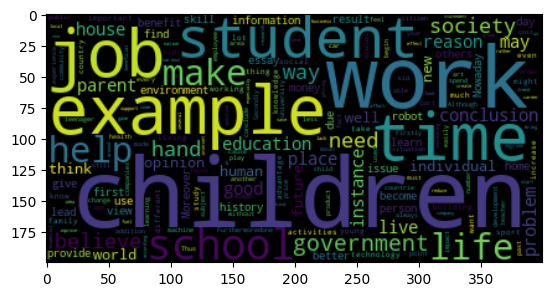

Score: 5.0


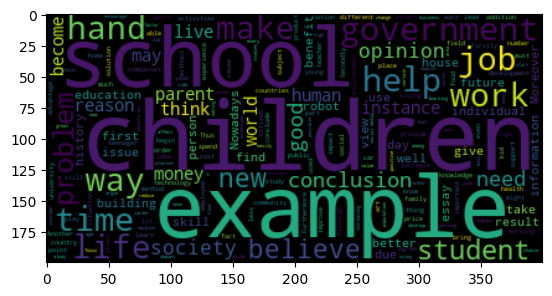

Score: 5.5


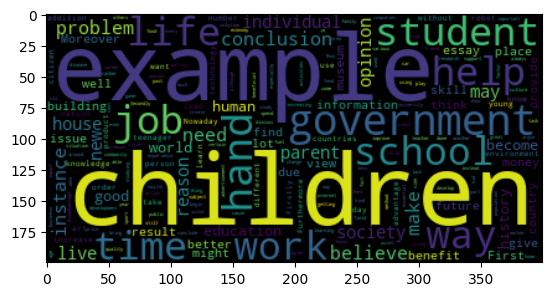

Score: 6.0


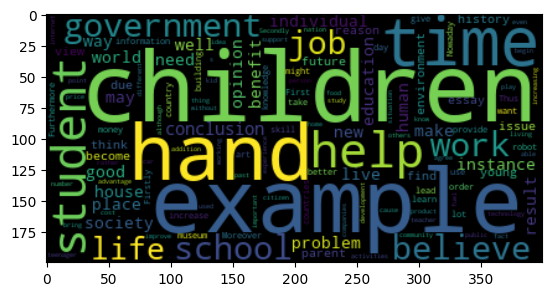

Score: 6.5


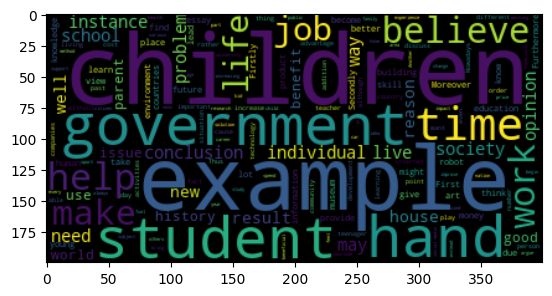

Score: 7.0


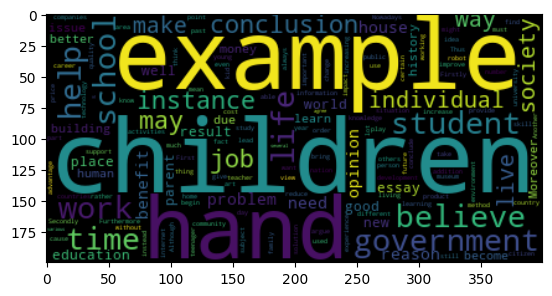

Score: 7.5


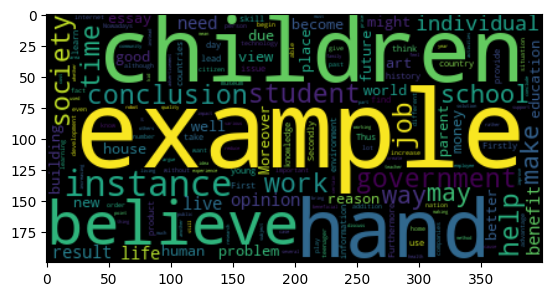

Score: 8.0


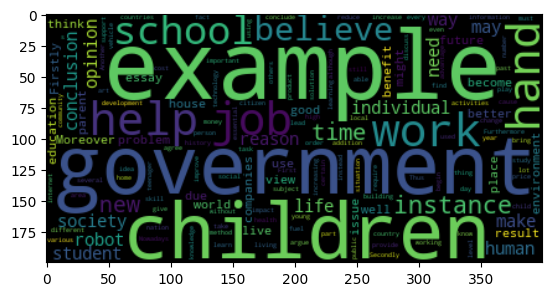

Score: 8.5


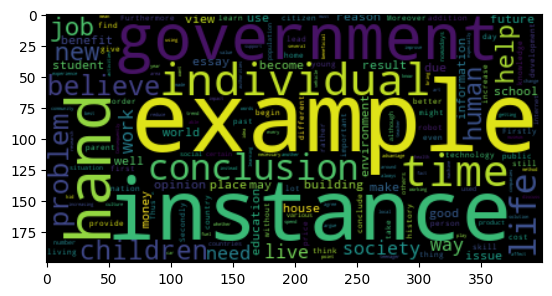

In [31]:
task.print_wordcloud()

# Coherence and cohesion score
---
A similar pattern emerges here as observed with the task score.

In [33]:
df["coherence_and_cohesion_score"].hist(bins=100)

In [34]:
coherence_essay = [(df["essay"], df["coherence_and_cohesion_score"])]
coherence = wordcloud_per_score(coherence_essay, stopwords)

Score: 4.0


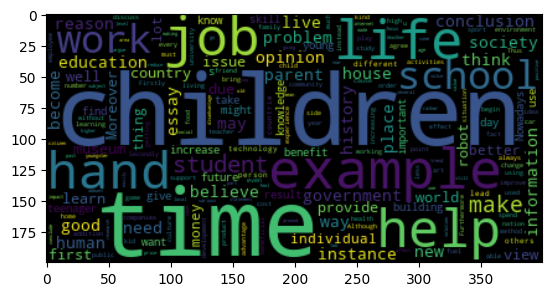

Score: 4.5


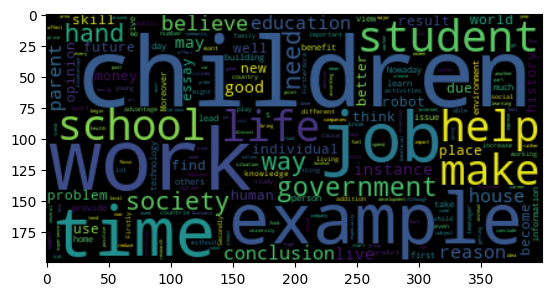

Score: 5.0


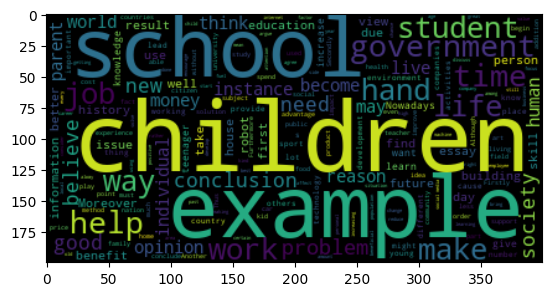

Score: 5.5


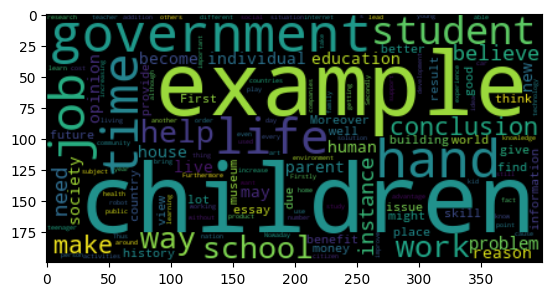

Score: 6.0


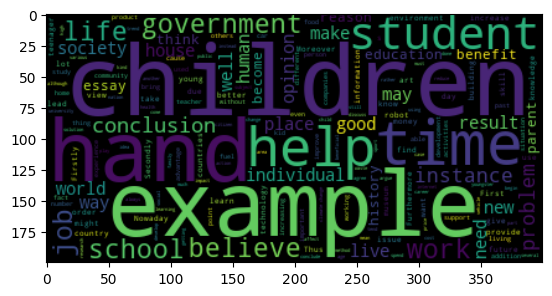

Score: 6.5


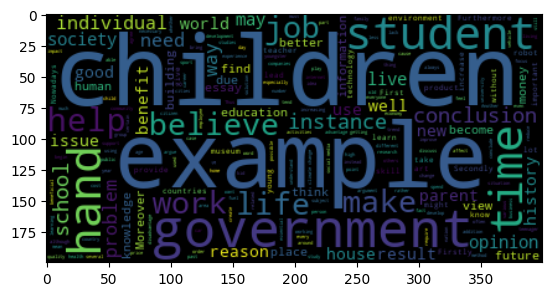

Score: 7.0


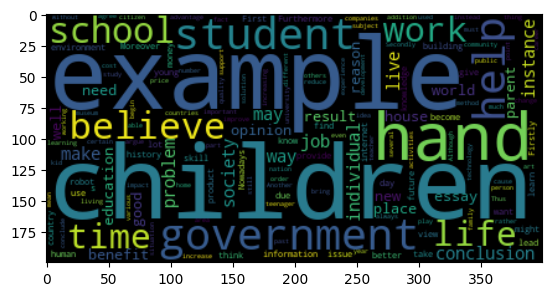

Score: 7.5


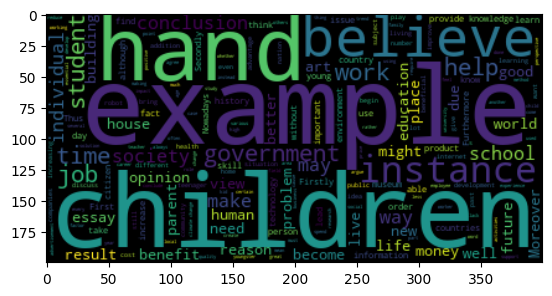

Score: 8.0


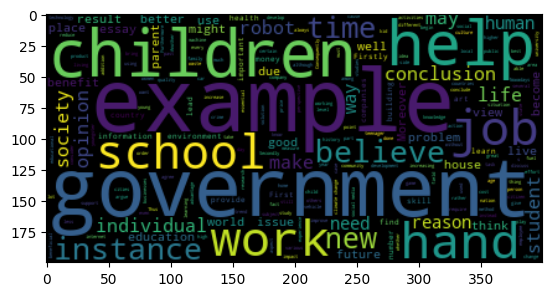

Score: 8.5


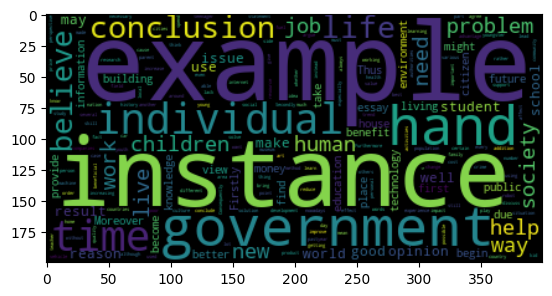

In [35]:
coherence.print_wordcloud()

# Lexical resource score
---
A similar pattern can be observed here as well, with the words individual and instance becoming more prominent in higher-rated essays.

In [36]:
df["lexical_resource_score"].hist(bins=100)

In [37]:
lexical_essay = [(df["essay"], df["lexical_resource_score"])]
lexical = wordcloud_per_score(lexical_essay, stopwords)

Score: 4.0


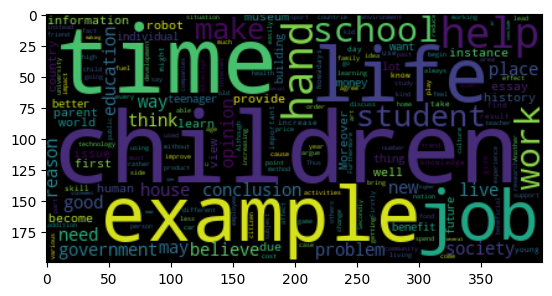

Score: 4.5


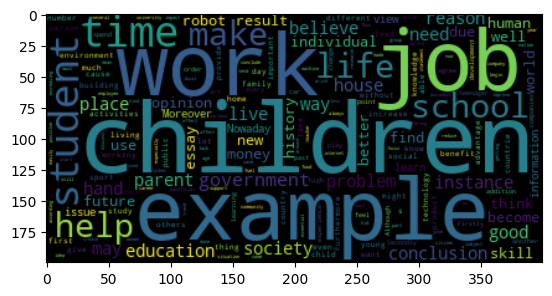

Score: 5.0


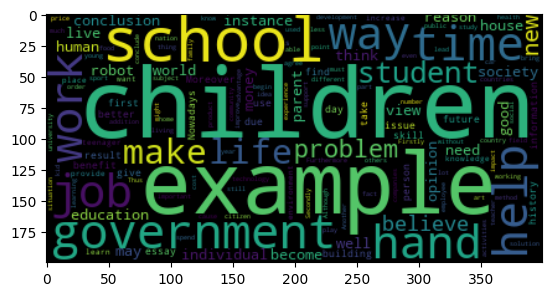

Score: 5.5


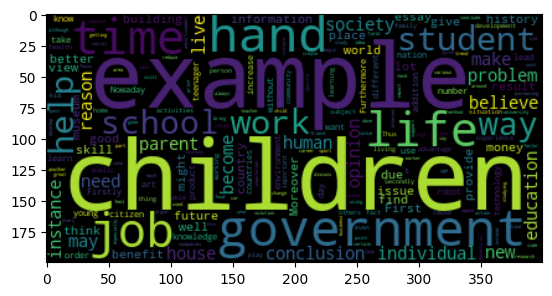

Score: 6.0


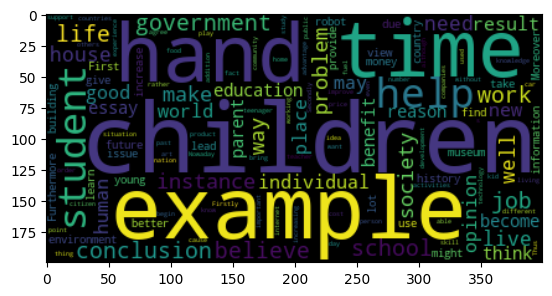

Score: 6.5


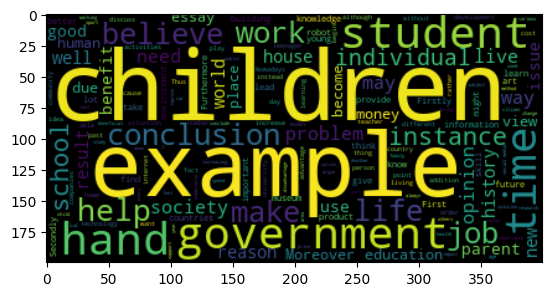

Score: 7.0


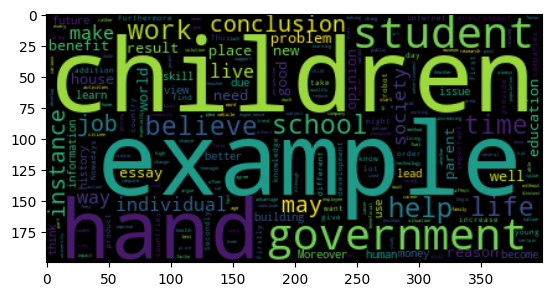

Score: 7.5


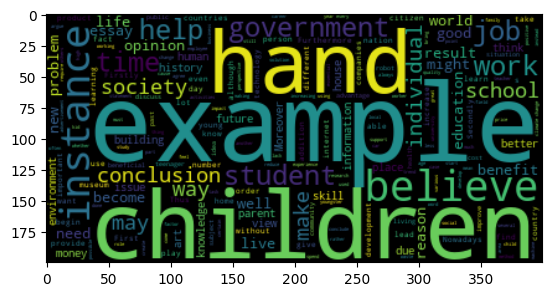

Score: 8.0


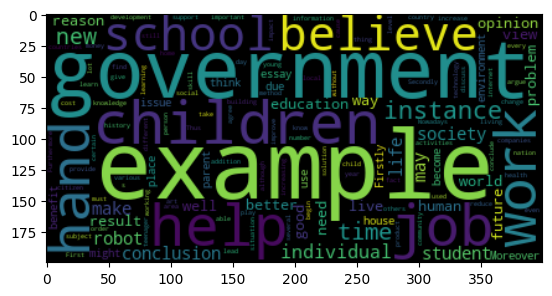

Score: 8.5


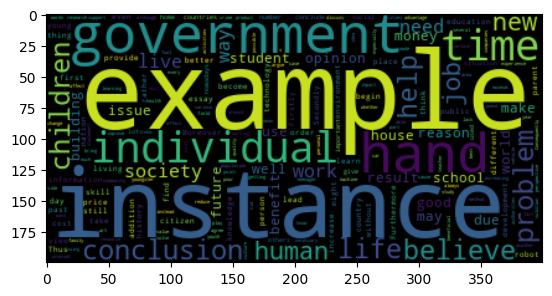

In [38]:
lexical.print_wordcloud()

# Grammatical range and accuracy score
---
A similar pattern emerges here as well; however, it's important to note that only word frequencies are considered, which means grammatical structures are not represented. Nevertheless, it becomes more apparent that the word frequencies in higher-rated essays are somewhat more balanced.

This may indicate that greater vocabulary diversity tends to correlate with higher scores.

In [39]:
df["grammatical_range_and_accuracy_score"].hist(bins=100)

In [40]:
grammatical_essay = [(df["essay"], df["grammatical_range_and_accuracy_score"])]
gramma = wordcloud_per_score(grammatical_essay, stopwords)

Score: 4.0


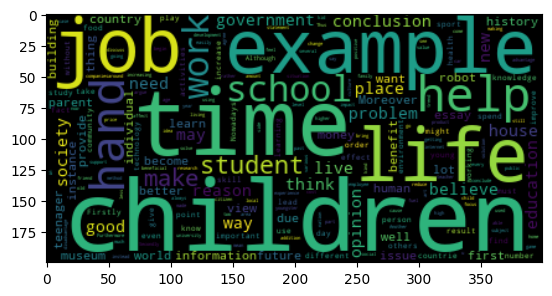

Score: 4.5


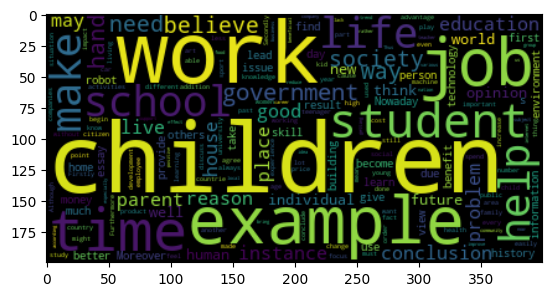

Score: 5.0


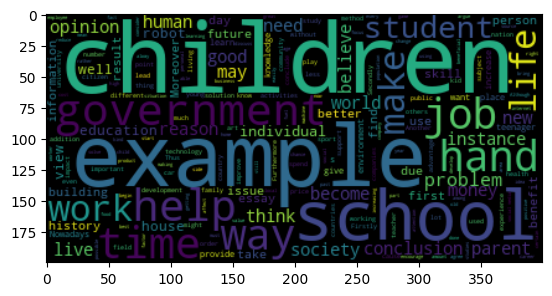

Score: 5.5


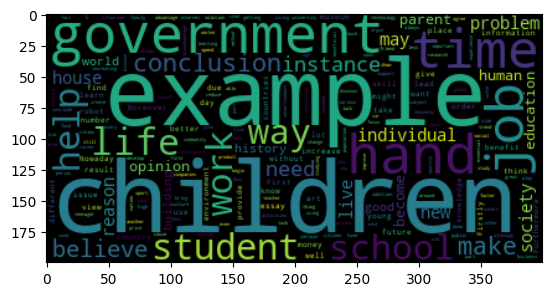

Score: 6.0


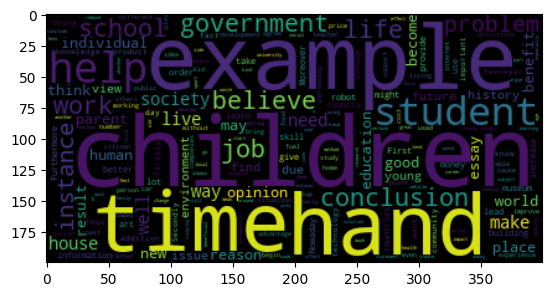

Score: 6.5


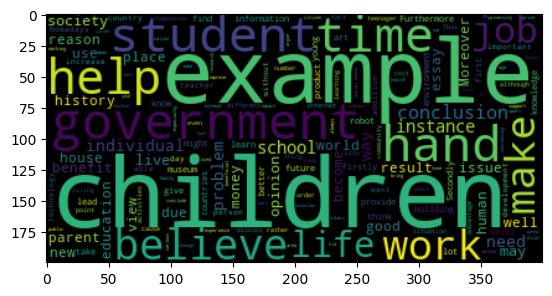

Score: 7.0


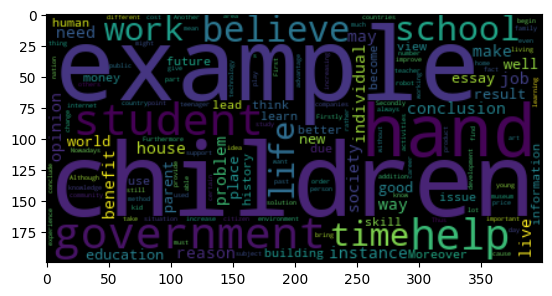

Score: 7.5


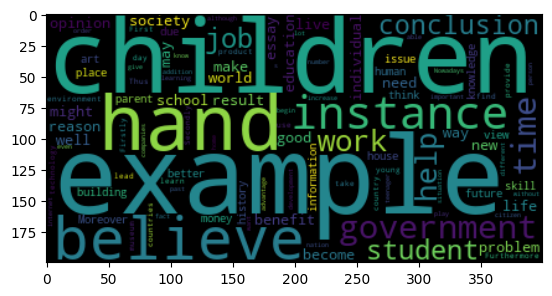

Score: 8.0


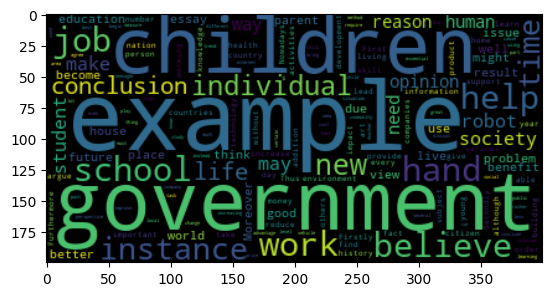

Score: 8.5


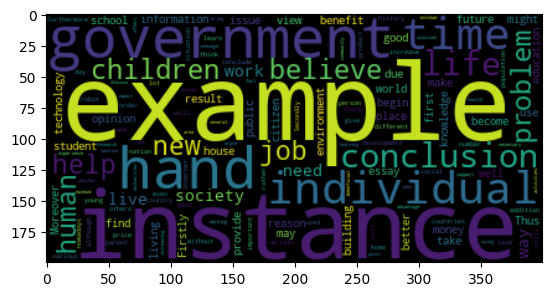

In [41]:
gramma.print_wordcloud()

### [`Click here to go back to the Homepage`](../Homepage.md)